# Predict the Average Rating of Books

In this project, we have worked on a books dataset published by Goodreads. The dataset comprised information/data on the following factors: Book ID, Book title, Authors and Co-Authors, Average rating, ISBN and ISBN 13, Language, Number of pages, Number of ratings count and Text reviews count, Publication date and Publisher.

A book lover before purchasing a book may prefer to consider one or more of the above mentioned factors with average rating, author, publisher being the most important ones.

With the onset of digital revolution, Goodreads as a platform is very popular amongst book readers. They prefer to look at the average rating and also the reviews provided by others.

For book readers like us, alongwith authors, publishers also play an important role. Publishers like Penguin, Harper Collin have always been associated with good books and hence play a very important role in determining the popularity of a book.

The objective behind building the model was to predict the average rating of a book based on various factors which play an important role in the determination.

This model definitely does not judge the books by their cover but by number of pages, language, publisher and author etc.

# Key Findings from the Data

From the Goodreads books dataset, we seek to find out the following:
- What is average rating for most of the books?
- In which year maximum books were published?
- Does Publication date, number of pages, text reviews count and ratings count really have an impact on the rating of the books?
- Who are the top 20 authors and publishers?
- In which language are most of the books read?

Let's dive into the dataset to gain insights and build a model to predict average rating.

### 1. Loading Libraries with Installations

`!pip install -r requirements.txt`


In [561]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2. Load the Goodreads Books Dataset

In [562]:
cols = ['bookID' ,'title',  'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', 'num_pages', 'ratings_count',      
        'text_reviews_count', 'publication_date', 'publisher',  'coauthor']
df = pd.read_csv(r'books_data.csv', names=cols, skiprows=1,engine='python', quotechar=',', on_bad_lines='warn')

Note, we have used quoting charcter ',' to prevent quoting issues. The engine is python and it is used when number of columns are variable.

### 3. Initial Analysis of the Data

In [563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  coauthor            4 non-null      object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


We have analyzed the datatype of respective columns. All are categorical variables, except book ID, ratings count and text reviews count

In [564]:
# Check the top 5 rows
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,coauthor
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,None
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,None
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,None
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,None
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,None


In [565]:
#Summary Statistics - Non-Categorical
df.describe().applymap('{:,.2f}'.format)

,bookID,ratings_count,text_reviews_count
count,"11,127.00","11,127.00","11,127.00"
mean,"21,310.94","17,936.49",541.86
std,"13,093.36","112,479.43","2,576.17"
min,1.00,0.00,0.00
25%,"10,287.00",104.00,9.00
50%,"20,287.00",745.00,47.00
75%,"32,104.50","4,993.50",237.50
max,"45,641.00","4,597,666.00","94,265.00"


Here, we analyze the summary statistics of only Quantitative/Non-Categorical variables

In [566]:
#Summary Statistics - Categorical
df.describe(include='object')

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,publication_date,publisher,coauthor
count,11127,11127,11127,11127,11127,11127,11127,11127,11127,4
unique,10352,6643,213,11126,11127,31,999,3682,2295,4
top,The Brothers Karamazov,Stephen King,4.00,3.58,9780439785969,eng,288,10/1/2005,Vintage,Harvard University Press
freq,9,40,219,2,1,8908,230,56,318,1


Here, we analyze the summary statistics of only Qualitative/Categorical variables

The dataset comprises 11127 rows. We observe that no columns have missing data. But, the column named co-author has only 4 rows. In the following section, we will deep dive into the co-author column.

###  4. Data Cleaning


The dataset comprises 13 columns. But we notice, the 13th column 'Co-Author' has only 4 rows whereas all other columns have 11127 rows. Let's examine further.


#### Examining the four rows below

In [567]:
dirty = df.loc[~df['coauthor'].isnull(), : ]

In [568]:
dirty

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,coauthor
3348,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr./Sam B. Warner,3.58,0674842111,9780674842113,en-US,236,61,6,4/20/2004,Harvard University Press
4702,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9781593600112,eng,400,26,4,4/6/2004,Cold Spring Press\t
5877,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9781563841552,eng,342,38,4,1/15/1999,Huntington House Publishers
8979,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0.00,0851742718,9780851742717,eng,49,0,0,5/1/1977,Brown Son & Ferguson Ltd.


##### The average rating for these four rows is authors' name

In [569]:
coauthor = dirty.loc[:, 'average_rating']
coauthor = coauthor.rename("author2")

##### We will shift every other column to the left and we call this right side of data frame. 

In [570]:
right = dirty.loc[:, 'average_rating':'coauthor'].shift(periods=-1, axis=1)

##### All the other columns before author and taken as left. 

In [571]:
left = dirty.loc[:, :'authors']

##### We will merge the co author with author.  

In [572]:
left['authors'] = left['authors'] + coauthor

##### The left side will look like this. 

In [573]:
left

,bookID,title,authors
3348,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner Jr./Sam B. Warner
4702,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net one o...
5877,22128,Patriots (The Coming Collapse),James Wesley Rawles
8979,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown Son & Ferguson


##### The Right side

In [574]:
right

,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,coauthor
3348,3.58,0674842111,9780674842113,en-US,236,61,6,4/20/2004,Harvard University Press,None
4702,3.58,1593600119,9781593600112,eng,400,26,4,4/6/2004,Cold Spring Press\t,None
5877,3.63,156384155X,9781563841552,eng,342,38,4,1/15/1999,Huntington House Publishers,None
8979,0.00,0851742718,9780851742717,eng,49,0,0,5/1/1977,Brown Son & Ferguson Ltd.,None


#####  We will combine the data and name it 'Clean'. 

In [575]:
clean = pd.concat([left,  right, coauthor], axis=1)

In [576]:
clean = clean.drop(columns= ['coauthor'])

In [577]:
clean

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,author2
3348,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner Jr./Sam B. Warner,3.58,0674842111,9780674842113,en-US,236,61,6,4/20/2004,Harvard University Press,Jr./Sam B. Warner
4702,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net one o...,3.58,1593600119,9781593600112,eng,400,26,4,4/6/2004,Cold Spring Press\t,one of the founding members of this Tolkien w...
5877,22128,Patriots (The Coming Collapse),James Wesley Rawles,3.63,156384155X,9781563841552,eng,342,38,4,1/15/1999,Huntington House Publishers,Rawles
8979,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown Son & Ferguson,0.00,0851742718,9780851742717,eng,49,0,0,5/1/1977,Brown Son & Ferguson Ltd.,Son & Ferguson


##### Replace the dirty rows with the newly created clean data frame

In [578]:
df.loc[clean.index, :] = clean

While examining the dataset, we found out that for the 4 rows under dicussion, there was a shift of data by 1 column. This means that some of the authors had shifted to the 'Average Rating' column. The average ratings for the respective rows had shifted to the 'ISBN' column and so forth. Hence, we had a 13th column which had publishers' name due to this data shift.

We have corrected this above and the dataframe 'df' is now clean.

### 5. Removing the Columns 
We will remove 'coauthor', 'bookID', 'isbn', 'isbn13' as we will not consider them in building the Average Rating Prediction Model.

In [579]:
df = df.drop(columns= ['coauthor', 'bookID', 'isbn', 'isbn13'])

In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               11127 non-null  object
 1   authors             11127 non-null  object
 2   average_rating      11127 non-null  object
 3   language_code       11127 non-null  object
 4   num_pages           11127 non-null  object
 5   ratings_count       11127 non-null  int64 
 6   text_reviews_count  11127 non-null  object
 7   publication_date    11127 non-null  object
 8   publisher           11127 non-null  object
dtypes: int64(1), object(8)
memory usage: 782.5+ KB


### 6. Changing the Data type of Variables

After analysing, we noticed that the datatype of the quantitative/non-categorical variables such as average average_rating, num_pages, text_reviews_count is object. The publication_date which is a date is also object.

For building a datset suitable for predictive modelling, we will change the data type of the variables to numeric.

In [581]:
#Changing the data type of the variables to Float/Int
df['average_rating'] = df['average_rating'].astype(np.float32)
df['num_pages'] = df['num_pages'].astype(np.int32)
df['ratings_count'] = df['ratings_count'].astype(np.int32)
df['text_reviews_count'] = df['text_reviews_count'].astype(np.int32)

In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   authors             11127 non-null  object 
 2   average_rating      11127 non-null  float32
 3   language_code       11127 non-null  object 
 4   num_pages           11127 non-null  int32  
 5   ratings_count       11127 non-null  int32  
 6   text_reviews_count  11127 non-null  int32  
 7   publication_date    11127 non-null  object 
 8   publisher           11127 non-null  object 
dtypes: float32(1), int32(3), object(5)
memory usage: 608.6+ KB


##### Checking if the data is clean and there are no unwanted data and columns

In [583]:
df.iloc[3348, :]

title                 Streetcar Suburbs: The Process of Growth in Bo...
authors                               Sam Bass Warner Jr./Sam B. Warner
average_rating                                                     3.58
language_code                                                     en-US
num_pages                                                           236
ratings_count                                                        61
text_reviews_count                                                    6
publication_date                                              4/20/2004
publisher                                      Harvard University Press
Name: 3348, dtype: object

### 7. Converting Dates

In this section, we convert the data type of publication date to datetime as the name of the variable suggests. However, during analysis, it was detected that 2 dates were unfeasible. For example: November and June had 31 days instead of 30. We corrected the respective dates and assumed that it will be the 30th day of the month under consideration.

In [584]:
dates = pd.to_datetime(df.publication_date, format="%m/%d/%Y", errors="coerce")

In [585]:
dates[dates.isnull()]

8180    NaT
11098   NaT
Name: publication_date, dtype: datetime64[ns]

##### The following 2 rows contain values that are not feasible dates as June and November does not have 31 days

In [586]:
#1
df.publication_date[8180]

'11/31/2000'

In [587]:
#2
df.publication_date[11098]

'6/31/1982'

##### Correction the dates and parsing it

In [588]:
df.iloc[8180, 7] = '11/30/2000' 
df.iloc[11098, 7] = '6/30/1982'

df.publication_date = pd.to_datetime(df.publication_date, format="%m/%d/%Y", errors="raise")

In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               11127 non-null  object        
 1   authors             11127 non-null  object        
 2   average_rating      11127 non-null  float32       
 3   language_code       11127 non-null  object        
 4   num_pages           11127 non-null  int32         
 5   ratings_count       11127 non-null  int32         
 6   text_reviews_count  11127 non-null  int32         
 7   publication_date    11127 non-null  datetime64[ns]
 8   publisher           11127 non-null  object        
dtypes: datetime64[ns](1), float32(1), int32(3), object(4)
memory usage: 608.6+ KB


### 8. Exploratory Data Analysis with Charts and Tables

We analyze the data a bit more to understand the pattern and relationship between variables. This exploratory data analysis through charts and tables will help us gain valuable insights about the dataset.

C:\Users\deepa\AppData\Local\Temp\ipykernel_36892\3131503152.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rating, bins=20)


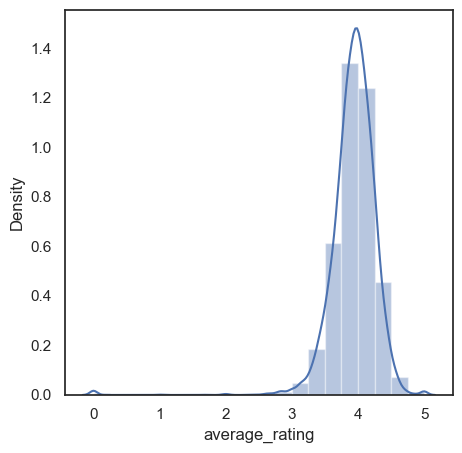

In [590]:
#Distribution Graph
plt.figure(figsize=(5,5))
rating= df.average_rating
sns.distplot(rating, bins=20)
plt.show()

We see that the distribution curve for 'Average Rating' is negatively skewed. This implies that most of the average ratings are concentrated between 3 to 5. However, as per the above average rating of 5 is rare.

##### Books with the highest average rating of 5.0

Looking at the just the top 10 books doesnt make sense. As there are more than 10 books with highest average rating i.e 5.0. Let's pull out a list of books with the average rating of 5.0

In [591]:
# Let's look at the top 10 rated books
df.sort_values('average_rating',ascending=False)
#Check the max average rating
df["average_rating"].describe()

count    11127.000000
mean         3.933631
std          0.352446
min          0.000000
25%          3.770000
50%          3.960000
75%          4.135000
max          5.000000
Name: average_rating, dtype: float64

Here, we see for books the maximum average rating is 5.0. Now, we draw a list of the books with rating 5.0

In [592]:
books_highAverageRating=df.loc[(df.loc[:,'average_rating']==5),'title']
list_book=pd.DataFrame(books_highAverageRating).sort_values('title')
list_book.reset_index()

,index,title
0,10266,Bill Gates: Computer Legend (Famous Lives)
1,4935,Bulgakov's the Master and Margarita: The Text ...
2,5650,Colossians and Philemon: A Critical and Exeget...
3,624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...
4,6778,Delwau Duon: Peintiadau Nicholas Evans = Symph...
5,8547,Fanning the Flame: Bible Cross and Mission
6,9897,His Princess Devotional: A Royal Encounter Wit...
7,855,Literature Circle Guide: Bridge to Terabithia:...
8,1243,Middlesex Borough (Images of America: New Jersey)
9,9286,Oliver Wendell Holmes in Paris: Medicine Theo...


There are 22 books with maximum average rating (5.0).

##### Lets find out the Top 20 most read books based on ratings count -The Popular Books among readers

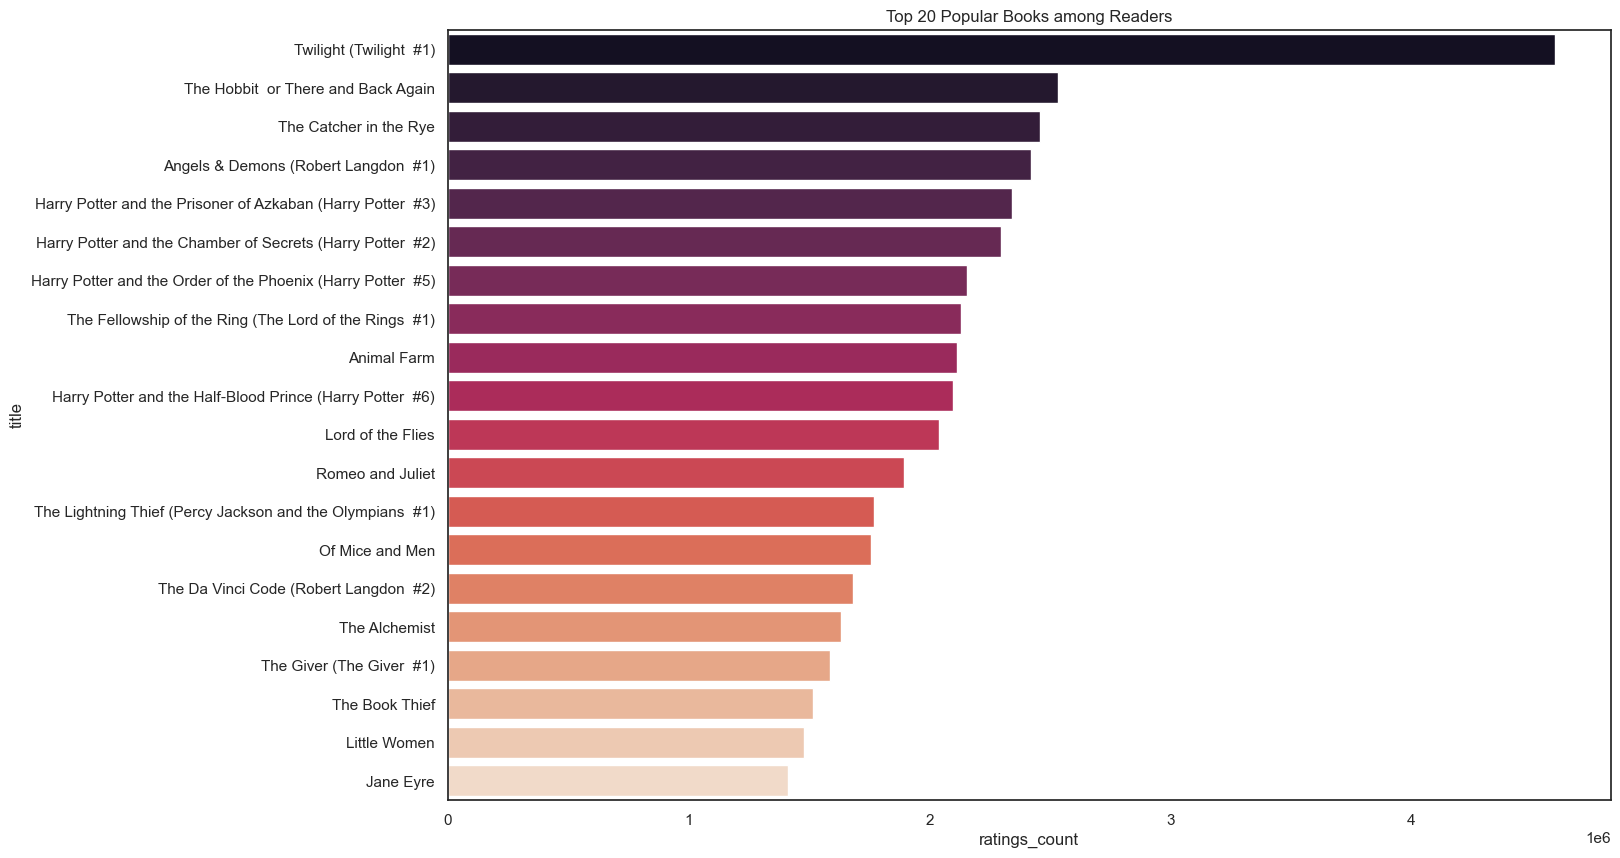

In [593]:
# Let's look at the top 20 rated books
top_20 = df.sort_values('ratings_count', ascending=False).head(20).set_index('title')

plt.figure(figsize=(15,10))
sns.barplot(x=top_20['ratings_count'], y=top_20.index, palette='rocket').set(title='Top 20 Popular Books among Readers');

Its interesting to note that the list of popular books 20 based on ratings count is completely different from the list of books that have the higest average rating of 5.0.
Let's check what is the average rating of the above 20 books

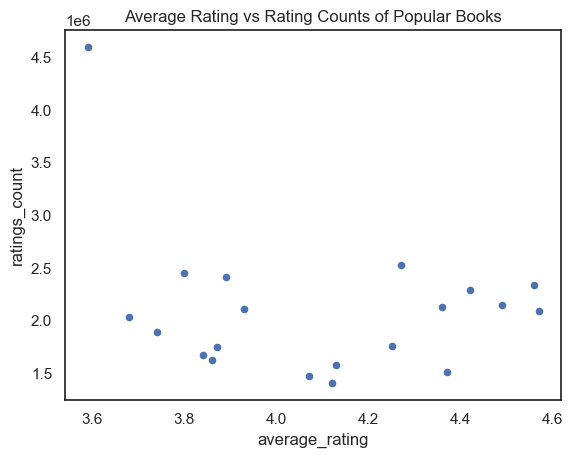

In [594]:
#Scatter plot for Average Ratinga and Ratings Count of Top 20 Popular Books
top_20.plot.scatter(x='average_rating', y='ratings_count', title='Average Rating vs Rating Counts of Popular Books');

1e6 represents million. The popular books have a comparatively high rating ranging between 3.6 to 4.6.

##### The language distribution of the books

In the pie chart provided below, we try to understand what are the top 5 languages in which the books in the dataset are published.

In [595]:
#Number of language codes in the dataset for the books
len(list(set(df.language_code)))

27

In [596]:
#Replace all english related language(en-US,en-GB,en-CA,enm) with one global code:eng
df['language_code']=df['language_code'].replace(['en-US','en-GB','en-CA','eng','enm'], 'eng')

In [597]:
np.unique(df.language_code)

array(['ale', 'ara', 'eng', 'fre', 'ger', 'gla', 'glg', 'grc', 'ita',
       'jpn', 'lat', 'msa', 'mul', 'nl', 'nor', 'por', 'rus', 'spa',
       'srp', 'swe', 'tur', 'wel', 'zho'], dtype=object)

In [598]:
language=df.language_code.value_counts()

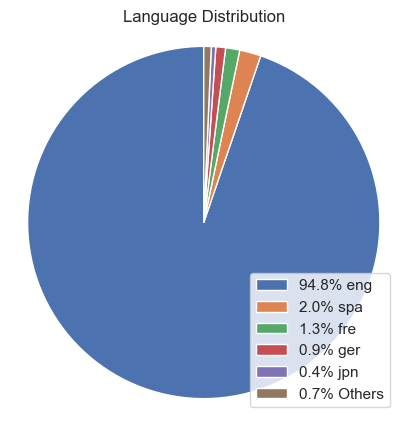

In [599]:
#Languages to keep
sorted_languages = language.index.tolist()
top_5_lang=sorted_languages[:5]
top_5_lang

#Other languages
other_languages=language.loc[~language.index.isin(top_5_lang)].sum()

#Create a new series with the top languages and others
selected_languages = pd.Series(data=language.loc[top_5_lang].tolist() + [other_languages],
                               index=top_5_lang + ['Others'])

#Plotting the above language data on a pie chart
# Create the pie chart
plt.figure(figsize=(5,5))
lang_legend=['English','Spanish','French','German','Japanese', 'Others']
patches, _, autotexts = plt.pie(selected_languages, labels=None, autopct='', startangle=90)
plt.title('Language Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a custom legend with percentage values
percentage_labels = [f'{p:.1f}% {label}' for p, label in zip(selected_languages / selected_languages.sum() * 100, selected_languages.index)]
plt.legend(patches, percentage_labels, loc='lower right')

# Display the pie chart
plt.show()

Approximately, 95% of the books in the dataset are in English. The other top languages in which the books were published are Spanish(spa), French(fre), German(ger), Japanese(jpn).

##### It will be interesting to find out, in which year maximum books were published.

The hypothesis here is that with the onset of digitization and internet availability now with a major section of the population, can we conclude that less books are demanded and hence published? This may be because a certain section of the population consider watching television, films as a mean of recreation. Before digitization, when availability of television was less or could be purchased by only the elite class, people resorted to books maybe more as a mean of recreation. Through this data can we gain any such insight. Let's check:

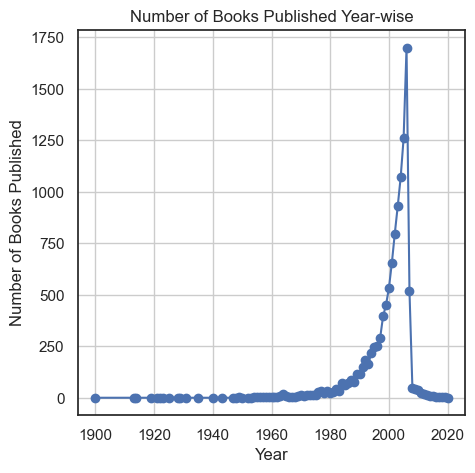

In [600]:
# Extract the year from the 'date' column
df['year'] = df['publication_date'].dt.year

books_published_per_year = df.groupby('year').size()

# Create the line graph
plt.figure(figsize=(5,5))
books_published_per_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.title('Number of Books Published Year-wise')
plt.grid()
plt.show()

So here we see, maximum of the books present in the dataset was published between 2005 -2006.

According to our dataset, the hypothesis above was incorrect. From the above graph, we can deduce that from 1900 till 1980, the books were published at a steady rate. The very low number for books published between 1900-1960 can be attributed to loss of data for many reasons. The number of books published started increasing from ~1980. It was the highest between 2005-2006. But suddenly saw a sharp drop after that. This can be because of a shift in demand preference from the books to OTT platforms. A lot of leisure book readers preferred to watch a series or movie on Netflix, Amazon Prime / Hulu than read books.

##### In the following graph, we analyze that how the average ratings have fluctuated over the years

In [601]:
over_years = df.groupby(pd.Grouper(key='publication_date', axis=0, freq='1Y')).mean().fillna(0).loc[:, 'average_rating']

C:\Users\deepa\AppData\Local\Temp\ipykernel_36892\3009904849.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  over_years = df.groupby(pd.Grouper(key='publication_date', axis=0, freq='1Y')).mean().fillna(0).loc[:, 'average_rating']


<Axes: xlabel='publication_date'>

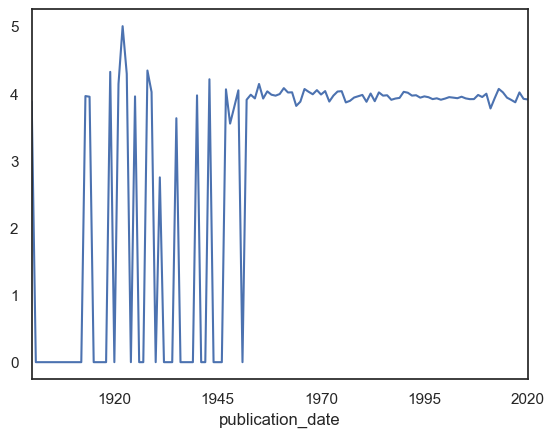

In [602]:
over_years.plot()

The average ratings of the book present in the dataset have fluctuated a lot between 1900-1955. From 1955, the average ratings seem to be stable at 4.0 on an average. (Please note, if no books were published in a certain year, we have assumed 0 books published for that year.)

In [603]:
over_monthwise = df.groupby(pd.Grouper(key='publication_date', axis=0, freq='1M')).mean().fillna(0).loc[:, 'average_rating']

C:\Users\deepa\AppData\Local\Temp\ipykernel_36892\4018826329.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  over_monthwise = df.groupby(pd.Grouper(key='publication_date', axis=0, freq='1M')).mean().fillna(0).loc[:, 'average_rating']


In [604]:
over_monthwise.head(2)

publication_date
1900-01-31    3.88
1900-02-28    0.00
Freq: M, Name: average_rating, dtype: float32

<Axes: xlabel='publication_date'>

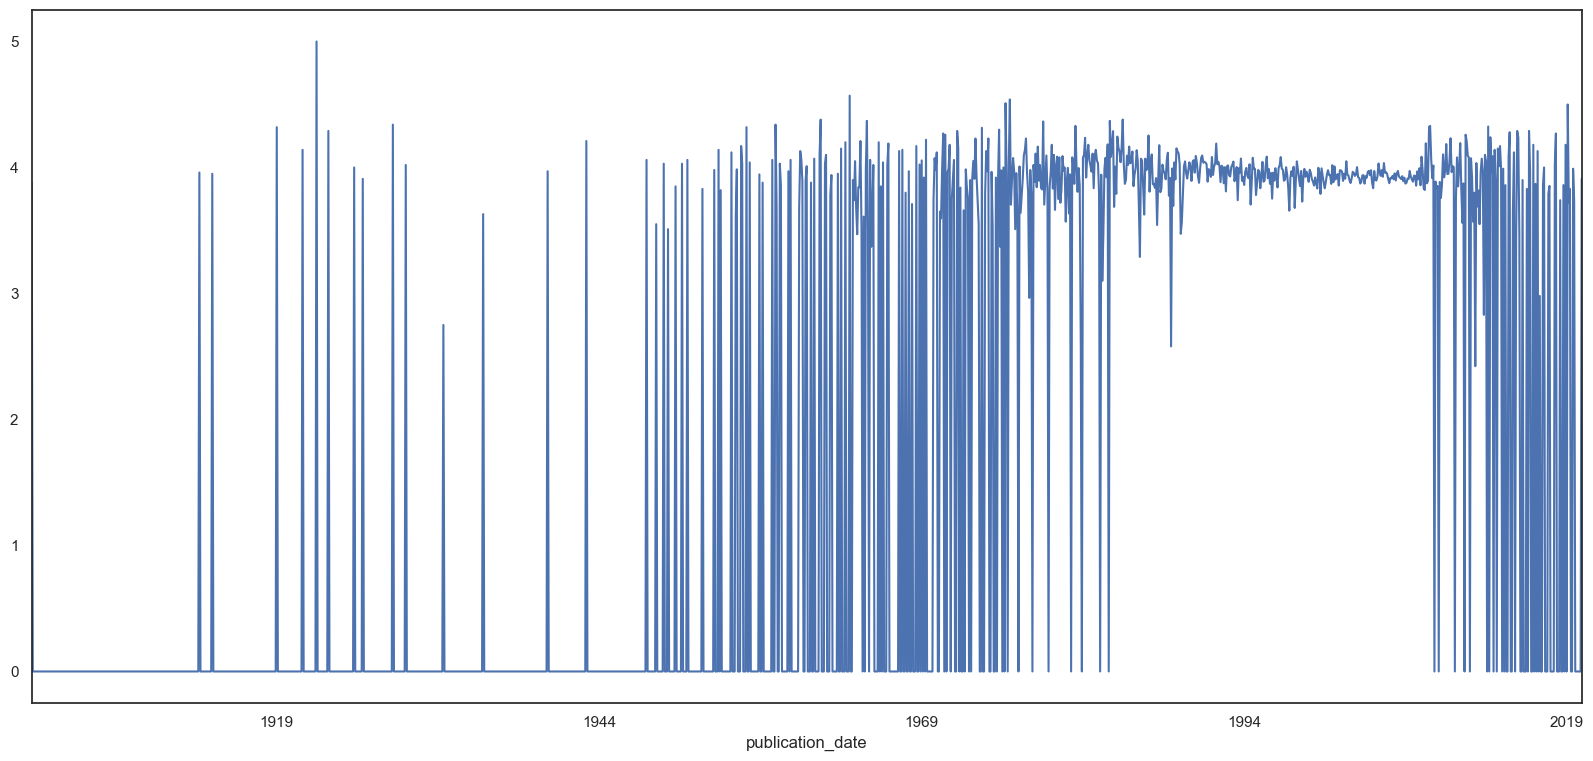

In [605]:
over_monthwise.plot(figsize=(20, 9))

In [606]:
type(over_monthwise)

pandas.core.series.Series

Here we can form a hypothesis that during vacations in the month of July-August and December-January, people prefer to read more books. Can it be possible to assume that the books will have a higher rating during these four months as compared to the other months.

In [607]:
over_months = df.groupby(df.publication_date.dt.month)['average_rating'].median()
over_months

publication_date
1     3.970
2     3.960
3     3.940
4     3.950
5     3.930
6     3.965
7     3.940
8     3.950
9     3.970
10    3.970
11    3.990
12    3.960
Name: average_rating, dtype: float32

Text(0, 0.5, 'Average Rating')

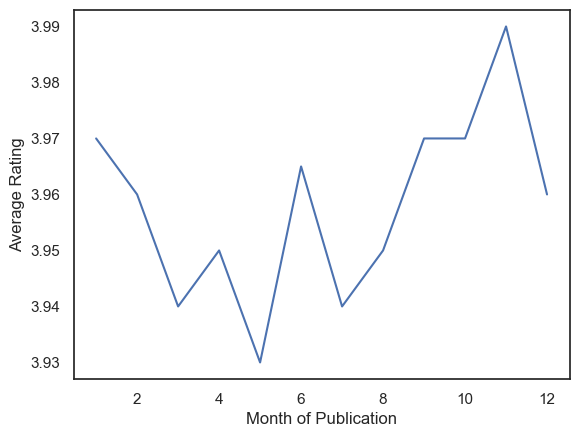

In [608]:
%matplotlib inline
over_months.plot();
plt.xlabel("Month of Publication")
plt.ylabel("Average Rating")

By looking at the above graph, we conclude that all the months in the year have an average rating 3.9-4.0 on an average. There is not a huge variance between the median of average rating for months.

##### For building the model and feature engineering, we wil subtract the datetime objects from 01/01/1970 to obtain an integer value 

In [609]:
df['publication_date_delta'] = (df.publication_date - pd.to_datetime('1900-01-01', format='%Y-%m-%d')).dt.days

##### Relationship between Average Rating and other variables

We want to analyze how average rating is related to other variables such as publication date, number of pages, number of text reviews and number of ratings count

<Axes: xlabel='publication_date_delta', ylabel='average_rating'>

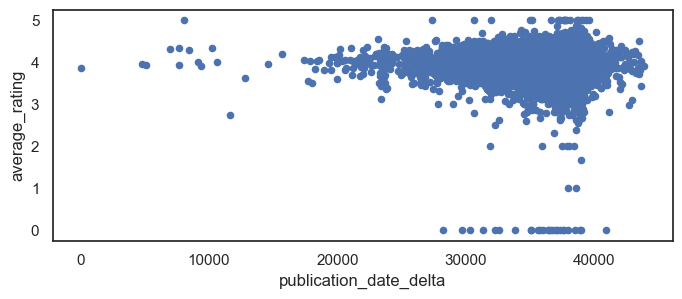

In [610]:
df.plot.scatter(x='publication_date_delta', y='average_rating', figsize=(8,3))

This chart is inconclusive. We cant determine any relationship by looking at the chart. A lot observations are clustered between 30000-40000 publication date delta

In [611]:
df['publication_year'] = df.publication_date.dt.year - 1900
df['publication_month'] = (df.publication_date.dt.year - 1900)*12 + df.publication_date.dt.month

df = df.drop(columns=['publication_date_delta', 'publication_date'])

<Axes: xlabel='num_pages', ylabel='average_rating'>

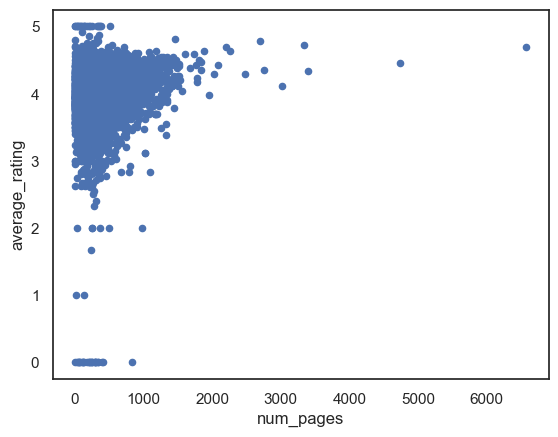

In [612]:
df.plot.scatter(x='num_pages', y='average_rating')

Through this chart, we can still conclude that there exists a weak positive relationship between number of pages and average rating. The higher the number of pages, average ratings are also increasing.

<Axes: xlabel='text_reviews_count', ylabel='average_rating'>

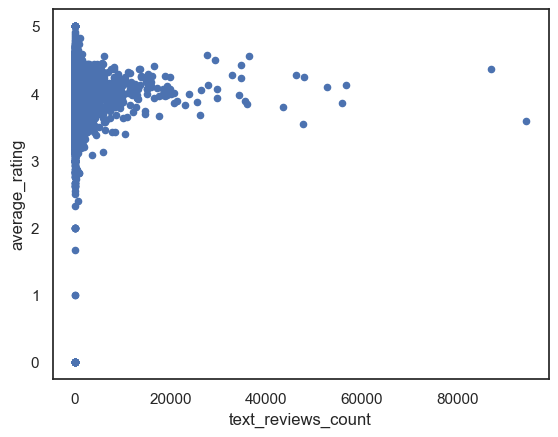

In [613]:
df.plot.scatter(x='text_reviews_count', y='average_rating')

Through this chart, we can deduce that there is a weak positive relationship between text reviews count and  average rating

<Axes: xlabel='ratings_count', ylabel='average_rating'>

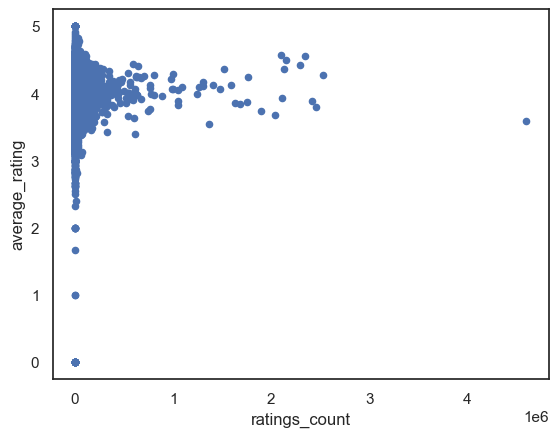

In [614]:
df.plot.scatter(x='ratings_count', y='average_rating')

As per the above chart, there exists a weak positive relationsip between ratings count and average rating. This sets the stage for looking at correlation between the variables

##### Correlation Table

C:\Users\deepa\AppData\Local\Temp\ipykernel_36892\1260150972.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=correlation_df.corr()


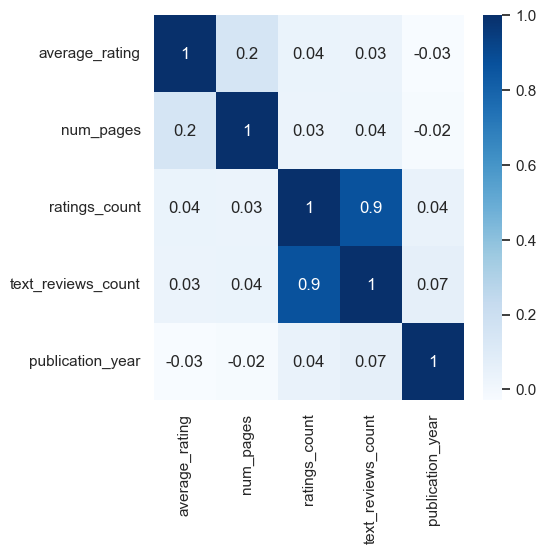

In [615]:
plt.figure(figsize=(5,5))
sns.set_theme(style="white")
correlation_df=df.drop(columns=['year','publication_month'], axis=1)
correlation=correlation_df.corr()
table_corr=sns.heatmap(correlation, annot=True, cmap= "Blues", fmt=".1g")

From the correlation table above, we can deduce that text reviews count have a very high positive relationship with ratings count. 
Average ratiing has weak positive relationship with number of pages, text revies count and ratings count. It also has a weak negative relationship with publication year

##### Now Let's  separate out all the co authors. Co authors are separted by a /. 

In [616]:
author_name=[]
for i in range(1, df["authors"].str.split("/", expand=True).shape[1] +1):
    author_name.append(f"Author_{i}") 
    

In [617]:
splitted = df["authors"].str.split("/", expand=True)

In [618]:
splitted.columns = author_name

In [619]:
df  = pd.concat((df, splitted), axis=1)

In [620]:
 df = df.drop(columns= ['authors'])

In [621]:
df.head(2)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,year,publication_year,publication_month,...,Author_42,Author_43,Author_44,Author_45,Author_46,Author_47,Author_48,Author_49,Author_50,Author_51
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,Scholastic Inc.,2006,106,1281,...,None,None,None,None,None,None,None,None,None,None
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,Scholastic Inc.,2004,104,1257,...,None,None,None,None,None,None,None,None,None,None


In [622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   average_rating      11127 non-null  float32
 2   language_code       11127 non-null  object 
 3   num_pages           11127 non-null  int32  
 4   ratings_count       11127 non-null  int32  
 5   text_reviews_count  11127 non-null  int32  
 6   publisher           11127 non-null  object 
 7   year                11127 non-null  int64  
 8   publication_year    11127 non-null  int64  
 9   publication_month   11127 non-null  int64  
 10  Author_1            11127 non-null  object 
 11  Author_2            4564 non-null   object 
 12  Author_3            1485 non-null   object 
 13  Author_4            479 non-null    object 
 14  Author_5            257 non-null    object 
 15  Author_6            192 non-null    object 
 16  Auth

In [623]:
df.columns

Index(['title', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publisher', 'year',
       'publication_year', 'publication_month', 'Author_1', 'Author_2',
       'Author_3', 'Author_4', 'Author_5', 'Author_6', 'Author_7', 'Author_8',
       'Author_9', 'Author_10', 'Author_11', 'Author_12', 'Author_13',
       'Author_14', 'Author_15', 'Author_16', 'Author_17', 'Author_18',
       'Author_19', 'Author_20', 'Author_21', 'Author_22', 'Author_23',
       'Author_24', 'Author_25', 'Author_26', 'Author_27', 'Author_28',
       'Author_29', 'Author_30', 'Author_31', 'Author_32', 'Author_33',
       'Author_34', 'Author_35', 'Author_36', 'Author_37', 'Author_38',
       'Author_39', 'Author_40', 'Author_41', 'Author_42', 'Author_43',
       'Author_44', 'Author_45', 'Author_46', 'Author_47', 'Author_48',
       'Author_49', 'Author_50', 'Author_51'],
      dtype='object')

#####  We take the higest rated records and filter out records with rating > 4. 

In [624]:
most_rated_records = df.sort_values(['ratings_count'], ascending=[False])
top_authors_total = most_rated_records.loc[most_rated_records.loc[:, 'average_rating'] > 4.0, :]
# top_authors_total = largel_ratings.sort_values(['average_rating'], ascending=[False])

In [625]:
top_authors_total.head(10)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,year,publication_year,publication_month,...,Author_42,Author_43,Author_44,Author_45,Author_46,Author_47,Author_48,Author_49,Author_50,Author_51
1697,The Hobbit or There and Back Again,4.27,eng,366,2530894,32871,Houghton Mifflin,2002,102,1232,...,None,None,None,None,None,None,None,None,None,None
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,eng,435,2339585,36325,Scholastic Inc.,2004,104,1253,...,None,None,None,None,None,None,None,None,None,None
4416,Harry Potter and the Chamber of Secrets (Harry...,4.42,eng,341,2293963,34692,Arthur A. Levine Books / Scholastic Inc.,1999,99,1194,...,None,None,None,None,None,None,None,None,None,None
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,Scholastic Inc.,2004,104,1257,...,None,None,None,None,None,None,None,None,None,None
23,The Fellowship of the Ring (The Lord of the Ri...,4.36,eng,398,2128944,13670,Houghton Mifflin Harcourt,2003,103,1245,...,None,None,None,None,None,None,None,None,None,None
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,Scholastic Inc.,2006,106,1281,...,None,None,None,None,None,None,None,None,None,None
7312,The Lightning Thief (Percy Jackson and the Oly...,4.25,eng,375,1766725,47951,Disney Hyperion Books,2006,106,1275,...,None,None,None,None,None,None,None,None,None,None
1069,The Giver (The Giver #1),4.13,eng,208,1585589,56604,Ember,2006,106,1273,...,None,None,None,None,None,None,None,None,None,None
5272,The Book Thief,4.37,eng,552,1516367,86881,Alfred A. Knopf,2006,106,1275,...,None,None,None,None,None,None,None,None,None,None
591,Little Women,4.07,eng,449,1479727,18458,Signet Classics,2004,104,1252,...,None,None,None,None,None,None,None,None,None,None


##### Get the top 50 authors and co-authors from them

In [626]:
n_coauthors = 51
top_authors = set()
for i in range(1, n_coauthors+1):
    top_authors = top_authors.union(set(top_authors_total.head(50)['Author_'+ str(i)]))

In [627]:
try:
    top_authors.remove(None)
    top_authors.remove('Anonymous')
except KeyError:
    pass

In [628]:
top_authors = list(top_authors)

Here, we have derived the list of the top 50 authors. Firstly, we filetered the dataframe based on ratings count in descending order and then filtered the books data having average rating greater than 4. Finally, from this filtered dataset we generated the list of Top 50 authors.

The double filtering based on ratings count and average rating denotes the authors selected in the list must have written books with substantial ratings count and average ratinng greater than 4.0.

Later in this notebook, we will use this list of top 50 authors to develop a feature 'Is Top Author' for building the machine learning model.

In [629]:
top_authors

['Robin Buss',
 'Rosemary Wells',
 'Cao Xuân Việt Khương',
 'Jeannette Walls',
 'William Shakespeare',
 'Maurgaux Motin',
 'Fyodor Dostoyevsky',
 'Arthur Golden',
 'Peter S. Beagle',
 'L.M. Montgomery',
 'Frances Hodgson Burnett',
 'Diana Gabaldon',
 'Anna Massey',
 'Neil Gaiman',
 'Michael Mason',
 'Sue Monk Kidd',
 'Harold Bloom',
 'Rex Gibson',
 'Barbara Kingsolver',
 'Garth Williams',
 'James Kinsley',
 'Mary GrandPré',
 'J.R.R. Tolkien',
 'Margaret Mitchell',
 'E.B. White',
 'Alice Walker',
 'Michael Crichton',
 'Anita Diamant',
 'Jodi Picoult',
 'Nicholas Sparks',
 'Chuck Palahniuk',
 'Oscar Wilde',
 'John Tenniel',
 'Agatha Christie',
 'Richard S. Hartmetz',
 'Kurt Vonnegut Jr.',
 'Jane Austen',
 'Roald Dahl',
 'Markus Zusak',
 'J.K. Rowling',
 'John Grogan',
 'David McDuff',
 'Charlotte Brontë',
 'Deidre Shauna Lynch',
 'Martin Gardner',
 'Jeffrey Eugenides',
 'Robin Waterfield',
 'Lois Lowry',
 'Jim Collins',
 'Rick Riordan',
 'Louisa May Alcott',
 'Lewis Carroll',
 'John Gris

##### We similarly calculate the top 50 publishers

In [630]:
most_rated_records = df.sort_values(['ratings_count'], ascending=[False])
top_publishers_total = most_rated_records.loc[most_rated_records.loc[:, 'average_rating'] > 4.0, :]

In [631]:
top_publishers = list(set(top_publishers_total.head(50)['publisher']))

We have used a similar approach that was used to generate the list of top authors here to generate the list of top publishers.

Later in this notebook, we will use this list of top 50 publishers to develop a feature 'Is Top Publisher' for building the machine learning model.

In [632]:
top_publishers

["St. Martin's Press",
 'Penguin',
 'Plaza y Janes',
 'Signet Classics',
 'Addison Wesley Publishing Company',
 'Hyperion Books',
 "Children's Classics",
 'Houghton Mifflin Harcourt',
 'W.W. Norton & Company (NYC)',
 'Algonquin Books',
 'Random House Large Print Publishing',
 'Warner Books (NY)',
 'Random House: Modern Library',
 'Headline Review',
 'Dial Press',
 'Cambridge University Press',
 'New English Library',
 'Alfred A. Knopf',
 'Scribner',
 'Oxford University Press',
 'Puffin Books',
 'New English Library (Hodder & Stoughton)',
 'Bantam',
 'Scholastic Inc.',
 'HarperCollinsPublishers',
 'Dell Publishing Company',
 'Penguin Classics',
 'Free Press',
 'Signet Book',
 'William Morrow Paperbacks',
 'Disney Hyperion Books',
 'Penguin Books',
 'Washington Square Press',
 'Grand Central Publishing',
 'Houghton Mifflin',
 'Warner Books',
 'Pocket',
 'Ballantine Books',
 'Penguin Group (USA)',
 'Harper Perennial Modern Classics',
 'Ember',
 'William Morrow; 1ST edition',
 'Arthur A. L

##### Here we construct two additional columns that is a part of the feature engineering


The columns are based on the following understand:
1. Whether given author belongs to a group of top 50 rated authors
2. Whether given publisher belongs to a group of top 50 rated publisher

We further clean the dataset by removing the unwanted colummns

In [633]:
def check_top_publishers(row, publisher_list):
    if not row in publisher_list:
        return False
    return True

df['publisher'] = df.loc[:,['publisher']].applymap(check_top_publishers, publisher_list=top_publishers)

def check_top_authors(row, authors_list):
    if not row in authors_list:
        return False
    return True

df[author_name] = df[author_name].applymap(check_top_authors, authors_list=top_authors)

df['is_top_author'] = False
df['is_top_publisher'] = df.publisher
for auth in author_name:
    df['is_top_author'] = df['is_top_author'] | df[auth]


df.drop(author_name + ['publisher'], inplace=True, axis=1)

#####  In the above step, we drop columns the author name, publisher name and title from the original dataset

In [634]:
df.head(3)

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,year,publication_year,publication_month,is_top_author,is_top_publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,2006,106,1281,True,True
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,2004,104,1257,True,True
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,eng,352,6333,244,2003,103,1247,True,False


In [635]:
ratings_95 = np.percentile(df.ratings_count.values, 5)

In [636]:
ratings_95

8.0

In [637]:
df.ratings_count.values

array([2095690, 2153167,    6333, ...,     820,     769,     113])

##### Here we are creating 2 additional columns: is_top_author, is_top_publisher. This is a part of our feature engineering process.

In [638]:
# df['is_top_20_author'] = pd.to_numeric(df['is_top_20_author'])

df.is_top_author = df.is_top_author.replace({True: 1, False: 0})
df.is_top_publisher = df.is_top_publisher.replace({True: 1, False: 0})

In [639]:
df.dtypes

title                  object
average_rating        float32
language_code          object
num_pages               int32
ratings_count           int32
text_reviews_count      int32
year                    int64
publication_year        int64
publication_month       int64
is_top_author           int64
is_top_publisher        int64
dtype: object

##### Some more Data Analysis through graphs and charts

<Axes: xlabel='ratings_count', ylabel='average_rating'>

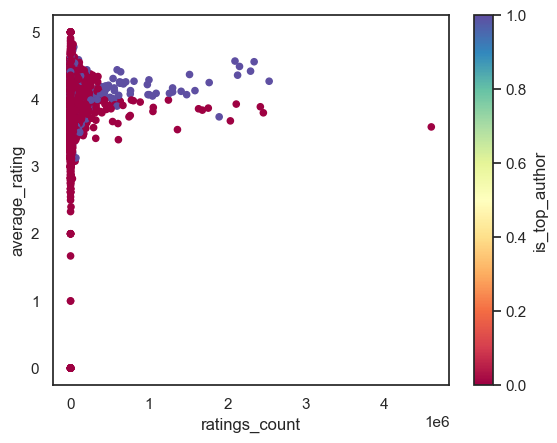

In [640]:
# cmap = plt.get_cmap('Spectral')
df.plot.scatter(x='ratings_count', y='average_rating', c='is_top_author', cmap='Spectral')

The bubbles in the above chart represent if the book belongs to a the top author or not. The purple bubbles represent data points of top author and the red represent data points of not a top author. 

We can see that the average rating and ratings count have a positive relationship for top authors.

<Axes: xlabel='ratings_count', ylabel='average_rating'>

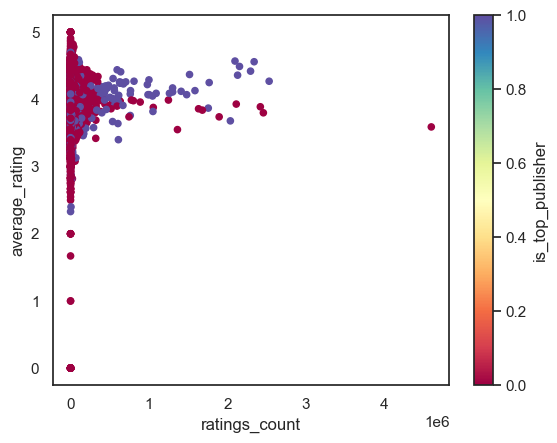

In [641]:
df.plot.scatter(x='ratings_count', y='average_rating', c='is_top_publisher', cmap='Spectral')

For only top publishers, there exists a positive relationship between average rating and ratings count. This means higher the ratings count, higher is the average rating.

<Axes: xlabel='num_pages', ylabel='average_rating'>

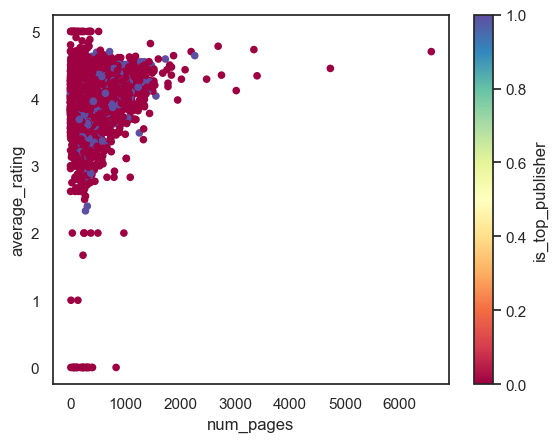

In [642]:
df.plot.scatter(x='num_pages', y='average_rating', c='is_top_publisher', cmap='Spectral')

The above graph also denotes for the top publishers, higher the number of pages, higher is the average rating.

<Axes: xlabel='num_pages', ylabel='average_rating'>

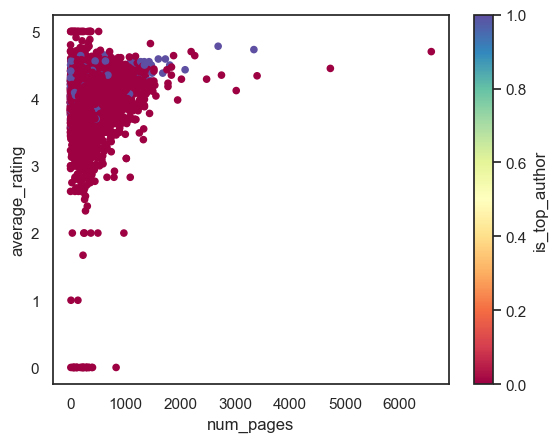

In [643]:
df.plot.scatter(x='num_pages', y='average_rating', c='is_top_author', cmap='Spectral')

The above chart is inconclusive. We cannot determine any relationship between average rating and number of pages

<Axes: xlabel='publication_year', ylabel='average_rating'>

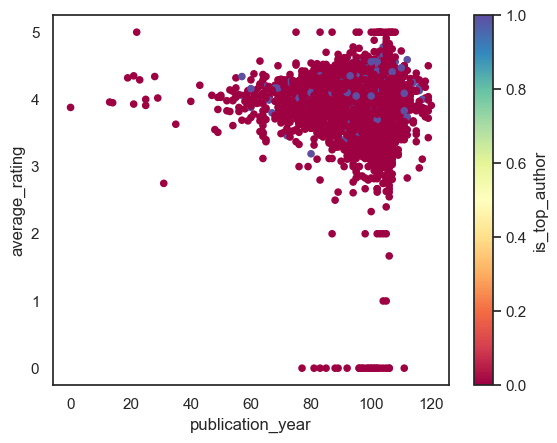

In [644]:
df.plot.scatter(x='publication_year', y='average_rating', c='is_top_author', cmap='Spectral')

The above chart is inconclusive. We cannot determine any relationship between average rating and publication year

### 9. Removing Outliers

<Axes: >

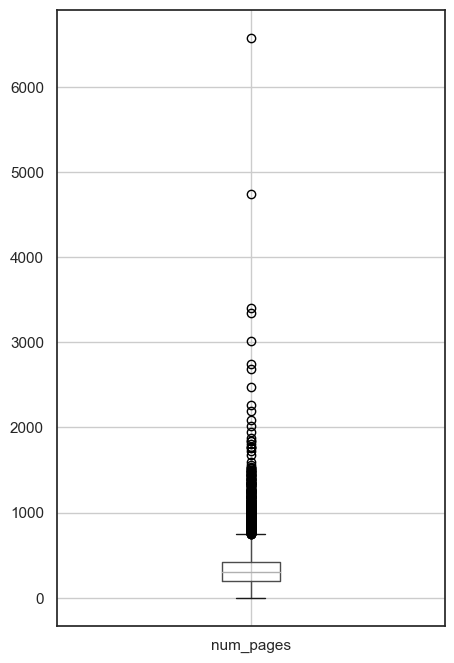

In [645]:
df.boxplot('num_pages', figsize=(5, 8))

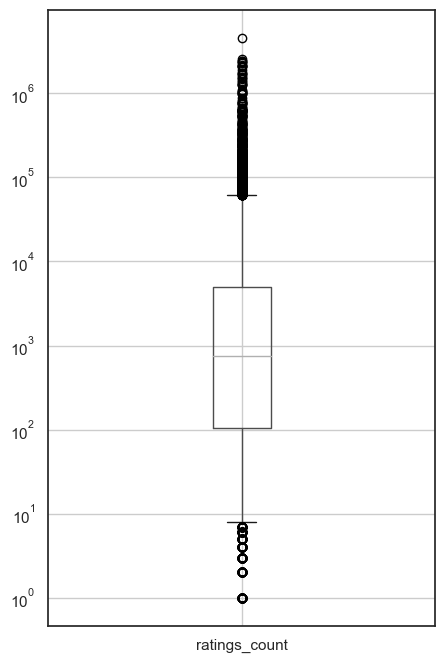

In [646]:
# df.boxplot('ratings_count', figsize=(15, 15))
import matplotlib.pyplot as plt

axes = df.boxplot(column='ratings_count', figsize=(5, 8),
                   whis=[5, 95], return_type='axes')
axes.set_yscale('log')
# for ax in axes.values():
#     ax.set_ylim(-2.5, 2.5)

plt.show()

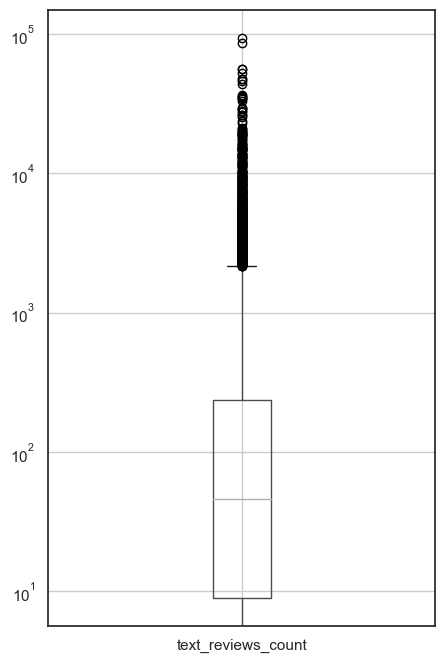

In [647]:
import matplotlib.pyplot as plt

axes = df.boxplot(column='text_reviews_count', figsize=(5, 8),
                   whis=[5,95], return_type='axes')
axes.set_yscale('log')

In [648]:
np.percentile(df.ratings_count, 97)

106816.93999999968

In [649]:
np.percentile(df.text_reviews_count, 97)

3532.4399999999987

##### The 'eligible_df' has been formed by removing extreme values or outliers from ratings count, number of pages and text reviews count.

The removal of outliers is an important step in model building. The presence of outliers will  affect the accuracy of the model. 

For example: While going through the dataset (check the dataframe 'check_outliers' below), it was noticed that the ratings count for some books were only 1. This is a biased data. We cannot feed this data to our machine learning model during the supervised learning process. This biased data will result in data anomaly or wrong prediction.

We have also dropped the 'title', 'language code' and 'year' column from the eligible df

In [650]:
check_outliers=df.loc[(df.loc[:, 'average_rating']>=4) & (df.loc[:,'ratings_count']==1),:]
check_outliers

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,year,publication_year,publication_month,is_top_author,is_top_publisher
217,We Were Not Like Other People,4.14,eng,216,1,0,1989,89,1069,0,0
481,The Suppliant Maidens/The Persians/Seven again...,4.10,eng,208,1,0,2004,104,1254,0,0
786,Willem de Kooning: Late Paintings,5.00,eng,83,1,0,2006,106,1281,0,0
2505,The Barefoot Book Of Ballet Stories,4.21,eng,96,1,0,2004,104,1257,0,0
3503,Swann's Way (Remembrance of Things Past #1),4.14,eng,380,1,0,2005,105,1261,0,0
3510,Falling Angels (Luc Actar #1),4.67,eng,216,1,0,2006,106,1274,0,0
4683,Christopher et son monde 1929-1939,4.11,fre,343,1,0,1981,81,976,0,0
4857,La Chatte Perdue = The Missing Cat (Les Aventu...,4.14,fre,64,1,0,2006,106,1280,0,0
4859,Die Verschwundene Katze = The Missing Cat,4.14,ger,64,1,0,1996,96,1153,0,0
4921,Master and Commander (Aubrey/Maturin Book 1),4.10,eng,0,1,0,2004,104,1251,0,0


In [651]:
eligible_df = df.loc[ (df.loc[:, 'ratings_count'] < 100000) & (df.loc[:, 'ratings_count']>1) & (df.loc[:, 'num_pages'] < 1000) & (df.loc[:, 'text_reviews_count'] < 3500), :]

In [652]:
#Drop Year and Language_code
drop_col=['language_code','year']

eligible_df.drop(drop_col,axis=1, inplace=True)

C:\Users\deepa\AppData\Local\Temp\ipykernel_36892\2618484774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_df.drop(drop_col,axis=1, inplace=True)


In [653]:
title_df = eligible_df.loc[:, 'title']

In [654]:
eligible_df

,title,average_rating,num_pages,ratings_count,text_reviews_count,publication_year,publication_month,is_top_author,is_top_publisher
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,352,6333,244,103,1247,1,0
5,"Unauthorized Harry Potter Book Seven News: ""Ha...",3.74,152,19,1,105,1264,0,0
7,The Ultimate Hitchhiker's Guide: Five Complete...,4.38,815,3628,254,105,1271,0,0
9,The Hitchhiker's Guide to the Galaxy (Hitchhik...,4.22,215,4930,460,104,1256,0,0
10,The Hitchhiker's Guide to the Galaxy (Hitchhik...,4.22,6,1266,253,105,1263,0,0
...,...,...,...,...,...,...,...,...,...
11122,Expelled from Eden: A William T. Vollmann Reader,4.06,512,156,20,104,1260,0,0
11123,You Bright and Risen Angels,4.08,635,783,56,88,1068,0,1
11124,The Ice-Shirt (Seven Dreams #1),3.96,415,820,95,93,1124,0,1
11125,Poor People,3.72,434,769,139,107,1286,0,0


In [655]:
eligible_df.corr()

C:\Users\deepa\AppData\Local\Temp\ipykernel_36892\3252146839.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  eligible_df.corr()


,average_rating,num_pages,ratings_count,text_reviews_count,publication_year,publication_month,is_top_author,is_top_publisher
average_rating,1.000000,0.109114,0.059778,-0.001236,-0.043317,-0.042441,0.077308,-0.048562
num_pages,0.109114,1.000000,0.100322,0.086917,-0.006297,-0.005745,-0.010627,0.078309
ratings_count,0.059778,0.100322,1.000000,0.848478,0.083179,0.082918,0.060820,0.091858
text_reviews_count,-0.001236,0.086917,0.848478,1.000000,0.112768,0.112214,0.039805,0.114481
publication_year,-0.043317,-0.006297,0.083179,0.112768,1.000000,0.999411,-0.003247,-0.033938
publication_month,-0.042441,-0.005745,0.082918,0.112214,0.999411,1.000000,-0.002882,-0.034099
is_top_author,0.077308,-0.010627,0.060820,0.039805,-0.003247,-0.002882,1.000000,0.039431
is_top_publisher,-0.048562,0.078309,0.091858,0.114481,-0.033938,-0.034099,0.039431,1.000000


##### Creating a composite feature named 'Top Author Publisher' which denotes the datapoint belongs to a top author and publisher

In [656]:
eligible_df['top_author_publisher'] = eligible_df.loc[:, 'is_top_author'] * eligible_df.loc[:, 'is_top_publisher']

C:\Users\deepa\AppData\Local\Temp\ipykernel_36892\695664317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_df['top_author_publisher'] = eligible_df.loc[:, 'is_top_author'] * eligible_df.loc[:, 'is_top_publisher']


In [657]:
eligible_df = eligible_df.drop(columns=['title'])

###  10. Model Building

We are creating two dataframes X and Y. X represents the independent variables. Y is basically average rating which we want to predict with the help of our model. Hence, Y dataframe consists of the dependent variable

In [658]:
X = eligible_df.iloc[:, 1:]
y = eligible_df.iloc[:, 0]

##### We wont take any scaler as it did not have any effect on the accuracy of the model

In [659]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler()
st_scaler= StandardScaler()
# X = st_scaler.fit_transform(X)

In [660]:
X.head()

,num_pages,ratings_count,text_reviews_count,publication_year,publication_month,is_top_author,is_top_publisher,top_author_publisher
2,352,6333,244,103,1247,1,0,0
5,152,19,1,105,1264,0,0,0
7,815,3628,254,105,1271,0,0,0
9,215,4930,460,104,1256,0,0,0
10,6,1266,253,105,1263,0,0,0


### 11. Linear Regression Baseline

To get quick results and to see that our feature engineering worked. We immediately fed this to a linear regression model. This can act as a quick baseline.

In [661]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [662]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [663]:
predictions = lr.predict(X_test)

In [664]:
# evaluate the performance of the algorithm
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('MSE:', round(metrics.mean_squared_error(y_test, predictions),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

MAE: 0.21
MSE: 0.08
RMSE: 0.28


We see the Mean Squared Error (MSE) is 8%. The more accurate a model, MSE tends to 0. Our objective is to minimize MSE.

##### In the graph provided below, we provide a visual representation of the y-value predicted from the linear regression model and the actual y-value present in the data set for 5 samples.

                                                   title  Actual  Predicted
6798                                            Malinche    3.28   3.885388
6600                                 The Sot-Weed Factor    4.09   3.992520
10176      The Memory of Whiteness: A Scientific Romance    3.55   3.934532
4466                                     Mi vida en rose    3.99   3.926857
4818   Mission: Where's June? (Disney's Little Einstein)    4.50   3.873531


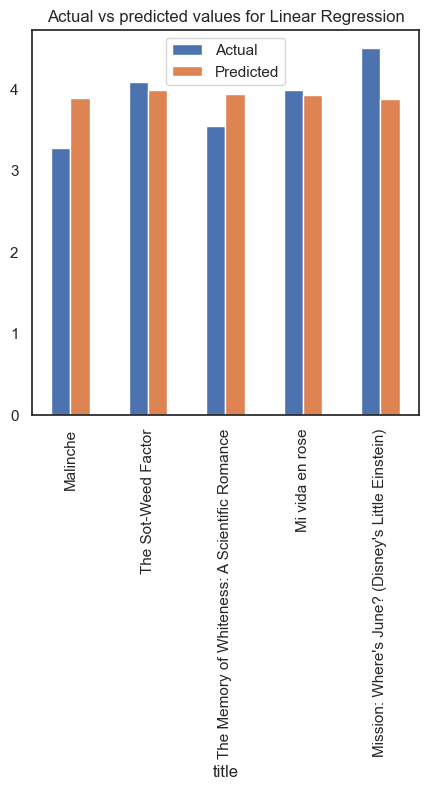

In [665]:
#For Linear Regression Sample of Actual vs Predicted Value
predictions_comparision = pd.DataFrame({'title': title_df[X_test.index], 'Actual': y_test, 'Predicted': predictions}).sample(5)
predictions_comparision.plot(x='title', y=['Actual', 'Predicted'], kind="bar", figsize=(5,5),title="Actual vs predicted values for Linear Regression")
print(predictions_comparision)

### 12. KFold Cross validation Method (k=4)

In [682]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression


k = 4
kf = KFold(n_splits=k, random_state=None)
lr_model= LinearRegression()

result = cross_val_score(lr_model , X, y, scoring='neg_mean_squared_error', cv = kf)

print("Avg accuracy: {}".format(result.mean().round(2)))

Avg accuracy: -0.08


In [667]:
result

array([-0.07616378, -0.08584695, -0.07797125, -0.0843146 ])

Please note, in scikit scores are always supposed to be maximized. Hence, we use negative mean square error instead of mean square error. We need to maximize this error meaning, closer to 0 better the model.

### 13. Comparitive Analysis of ML Algorithms

Install xgboost library before proceeeding further.
``` 
!pip install xgboost
```

##### Now we will compare the Linear Regression Model against XG Boost, Random Forest and Decison Tree

We have compared the average loss across different machine learninng models mentioned above to get a comprehensive outlook and optimize our results

##### For fair comparsion we will give the same split of X_train and y_train to all the models

Fold = 1
The average loss of linear regression is 0.08
The average loss of Decsion Tree is 0.15
The average loss of XG Boost is 0.09000000357627869
The average loss of Random Forest is 0.07
Fold = 2
The average loss of linear regression is 0.09
The average loss of Decsion Tree is 0.16
The average loss of XG Boost is 0.10000000149011612
The average loss of Random Forest is 0.08
Fold = 3
The average loss of linear regression is 0.08
The average loss of Decsion Tree is 0.15
The average loss of XG Boost is 0.09000000357627869
The average loss of Random Forest is 0.08
Fold = 4
The average loss of linear regression is 0.08
The average loss of Decsion Tree is 0.16
The average loss of XG Boost is 0.10000000149011612
The average loss of Random Forest is 0.08
----------------------Consolidated Results-----------------------------
The average loss of linear regression is 0.08
The average loss of XG Boost is 0.09000000357627869
The average loss of Random Forest is 0.08
The average loss of Decision

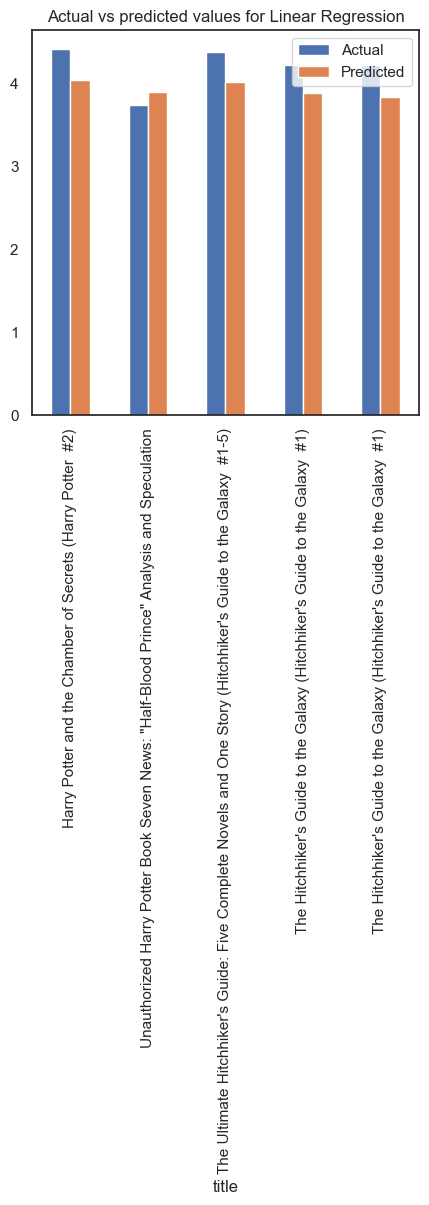

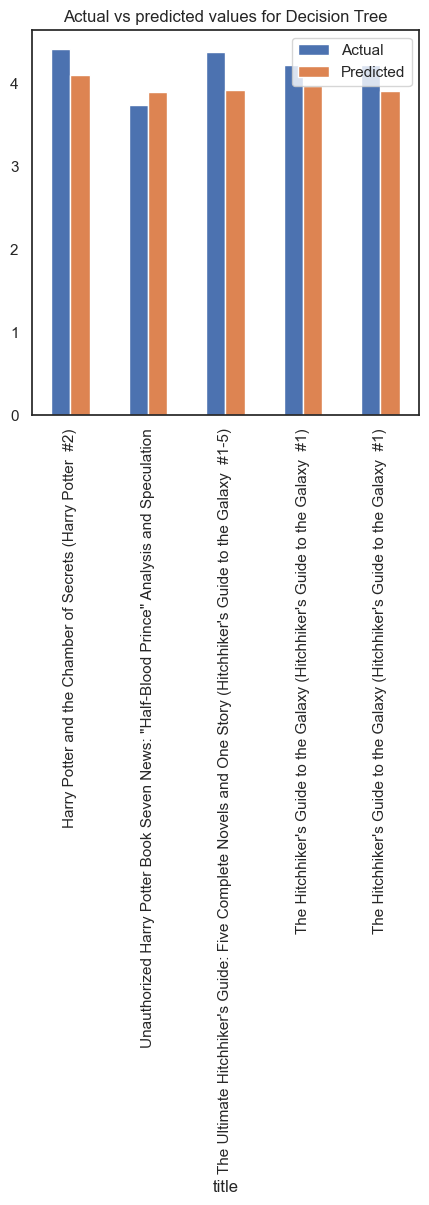

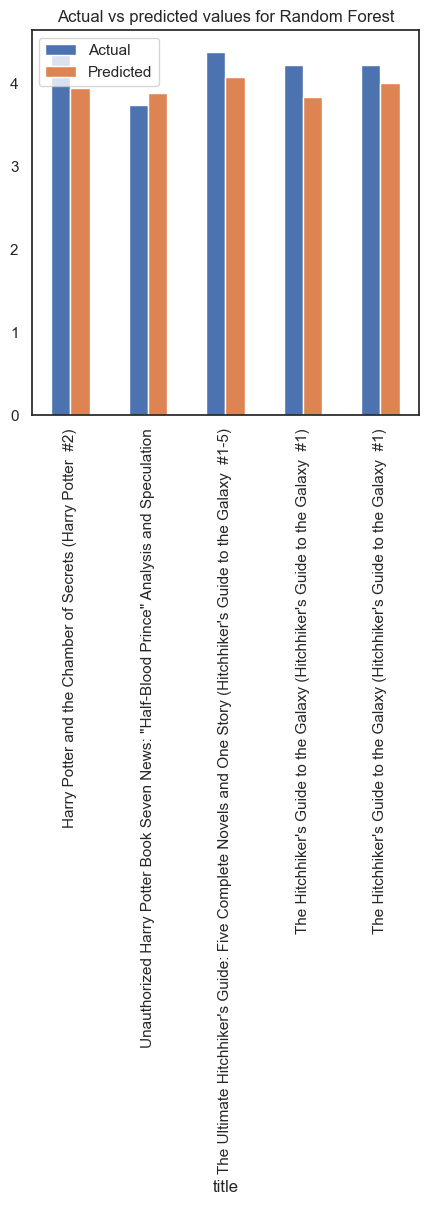

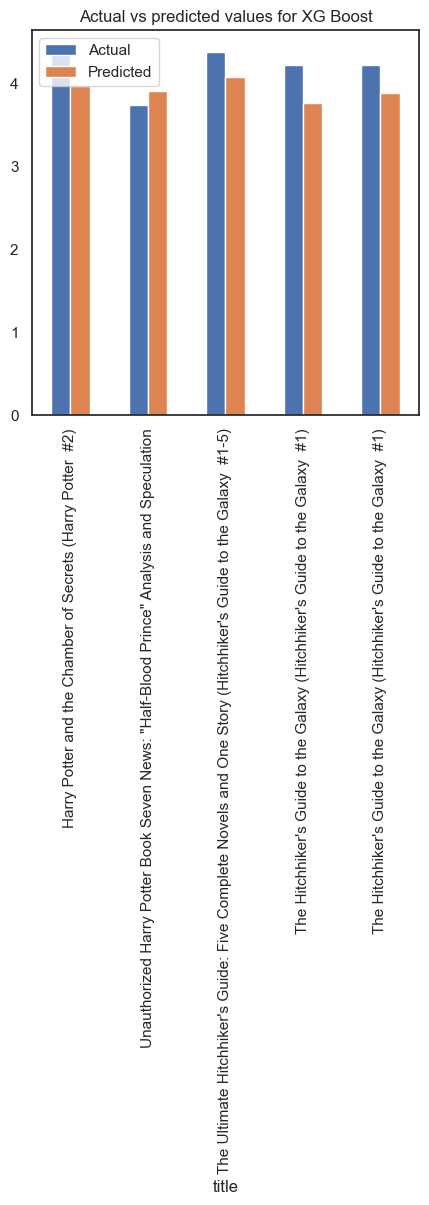

In [668]:
from sklearn.model_selection import cross_val_predict
from sklearn import tree
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

predicted_values_lr = []
predicted_values_dt = []
predicted_values_rf = []
predicted_values_xg = []

result_lr = []
result_xg = []
result_rf = []
result_dt = []


actual_values = []

X_test_total = pd.DataFrame()
i = 0 

for train_index, test_index in kf.split(X):
    print("Fold = {}".format(i+1))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    actual_values.extend(y_test)
    X_test_total = pd.concat((X_test_total, X_test), axis=0)
    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    predicted_values_lr.extend(y_pred_lr)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    result_lr.append(mse_lr)
    print("The average loss of linear regression is {}".format(mse_lr.round(2)))
    
    model_dt = tree.DecisionTreeRegressor()
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    predicted_values_dt.extend(y_pred_dt)
    mse_dt = mean_squared_error(y_test, y_pred_dt)
    result_dt.append(mse_dt)
    print("The average loss of Decsion Tree is {}".format(mse_dt.round(2)))
    
    model_xg = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
    model_xg.fit(X_train, y_train)
    y_pred_xg = model_xg.predict(X_test)
    predicted_values_xg.extend(y_pred_xg)
    mse_xg = mean_squared_error(y_test, y_pred_xg)
    result_xg.append(mse_xg)
    print("The average loss of XG Boost is {}".format(mse_xg.round(2)))
    
    regr = RandomForestRegressor(max_depth=5, random_state=0)
    regr.fit(X_train, y_train)
    y_pred_rf = regr.predict(X_test)
    predicted_values_rf.extend(y_pred_rf)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    result_rf.append(mse_rf)
    print("The average loss of Random Forest is {}".format(mse_rf.round(2)))
    
    i += 1

result_lr = np.mean(np.array(result_lr))
result_xg = np.mean(np.array(result_xg))
result_rf = np.mean(np.array(result_rf))
result_dt = np.mean(np.array(result_dt))

print("----------------------Consolidated Results-----------------------------")
print("The average loss of linear regression is {}".format(result_lr.round(2)))
print("The average loss of XG Boost is {}".format(result_xg.round(2)))
print("The average loss of Random Forest is {}".format(result_rf.round(2)))
print("The average loss of Decision Tree is {}".format(result_dt.round(2)))

#For Linear Regression Sample of Actual vs Predicted Value
predictions_comparision_lr = pd.DataFrame({'title': title_df[X_test_total.index],'Actual': actual_values, 'Predicted': predicted_values_lr}).head(5)
predictions_comparision_lr.plot(x='title', y=['Actual', 'Predicted'], kind="bar", figsize=(5,5),title="Actual vs predicted values for Linear Regression")
print("----Some Predicted values for Linear Regression ----")
print(predictions_comparision_lr)

#For DT Sample of Actual vs Predicted Value
predictions_comparision_dt = pd.DataFrame({'title': title_df[X_test_total.index],'Actual': actual_values, 'Predicted': predicted_values_dt}).head(5)
predictions_comparision_dt.plot(x='title', y=['Actual', 'Predicted'], kind="bar", figsize=(5,5),title="Actual vs predicted values for Decision Tree")
print("----Some Predicted values for Decision tree ----")
print(predictions_comparision_dt)


#For Random Forest Sample of Actual vs Predicted Value
predictions_comparision_rf = pd.DataFrame({'title': title_df[X_test_total.index],'Actual': actual_values, 'Predicted': predicted_values_rf}).head(5)
predictions_comparision_rf.plot(x='title', y=['Actual', 'Predicted'], kind="bar", figsize=(5,5),title="Actual vs predicted values for Random Forest")
print("----Some Predicted values for Random Forest ----")
print(predictions_comparision_rf)

#For xg boost Sample of Actual vs Predicted Value
predictions_comparision_xg = pd.DataFrame({'title': title_df[X_test_total.index],'Actual': actual_values, 'Predicted': predicted_values_xg}).head(5)
predictions_comparision_xg.plot(x='title', y=['Actual', 'Predicted'], kind="bar", figsize=(5,5),title="Actual vs predicted values for XG Boost")
print("----Some Predicted values for XG Boost ----")
print(predictions_comparision_xg)



##### The loss of Random Forest Model and Linear Regression Model is the lowest as compared to the other models

As compared to all the models, linear regression model and random forest model have higher accuracy i.e. the average loss for both the models is 0.08.

### 14. Interactive Graphs and Charts Showing Relationship between the Features


#### Install mpl cursors using

`!pip install mplcursors`

In [669]:
#Importing the libraries for interactive plots
import seaborn as sns
import matplotlib.pyplot as plt
from mplcursors import cursor

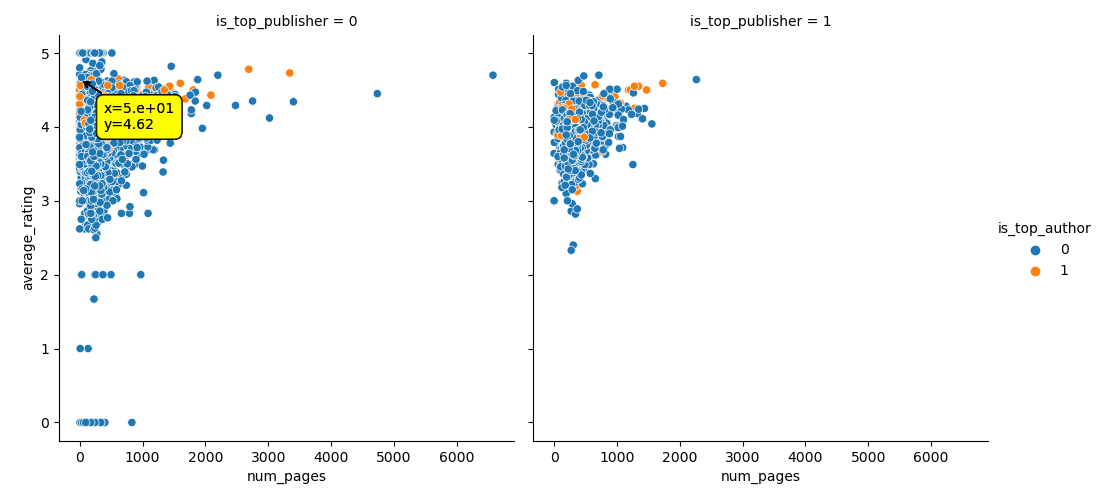

In [670]:
import os
from IPython.display import Image, display

#Chart 1
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_1.png')
display(Image(filename=img_full))

Using 
```
%matplotlib qt

sns.relplot(data=df, x="num_pages", y="average_rating", hue="is_top_author", col="is_top_publisher")
cursor(hover=True)
plt.show()
```

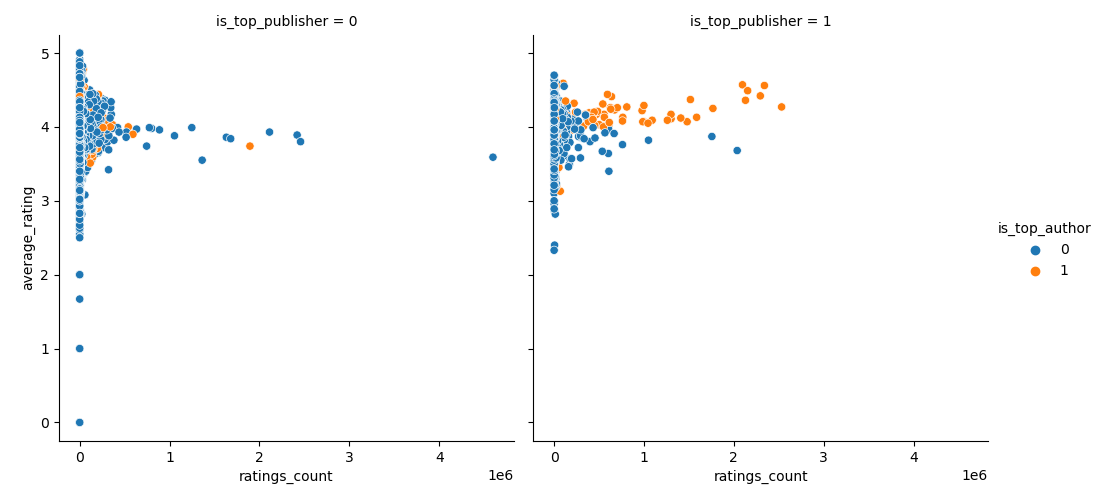

In [671]:
#Chart 2
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_2.png')
display(Image(filename=img_full))

Using
```
%matplotlib qt

sns.relplot(data=df, x="ratings_count", y="average_rating", hue="is_top_author", col="is_top_publisher")
cursor(hover=True)
plt.show()
```

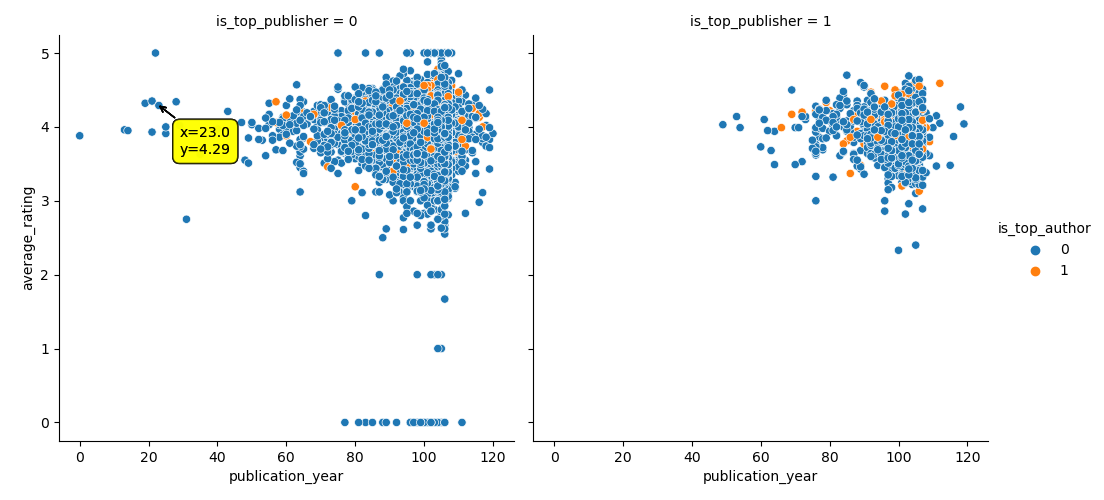

In [672]:
#Chart 3
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_3.png')
display(Image(filename=img_full))

Using 
```
%matplotlib qt

sns.relplot(data=df, x="publication_year", y="average_rating", hue="is_top_author", col="is_top_publisher")
cursor(hover=True)
plt.show()
```

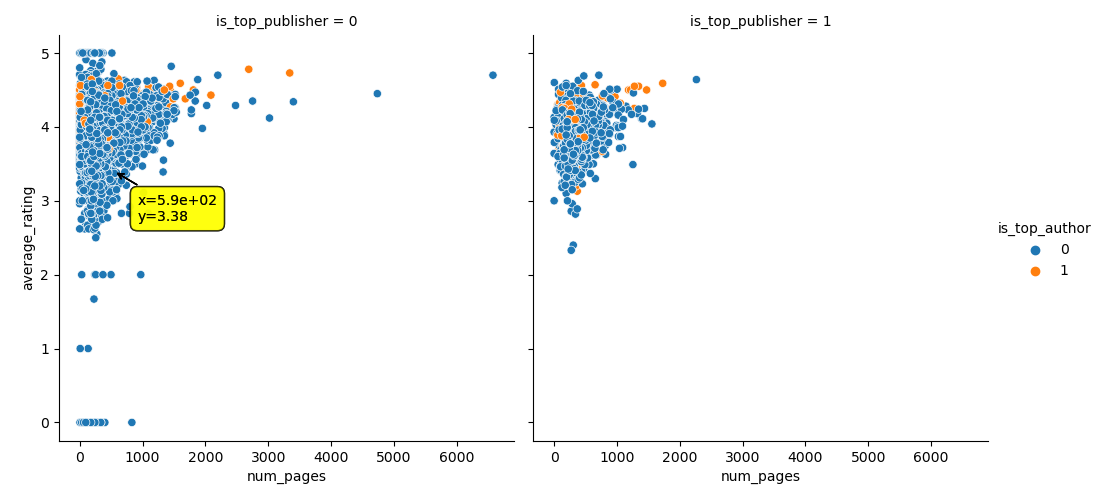

In [673]:
#Chart 4
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_4.png')
display(Image(filename=img_full))

Using 
```
%matplotlib qt

sns.relplot(data=df, x="num_pages", y="average_rating", hue="is_top_author", col="is_top_publisher")
cursor(hover=True)
plt.show()
```

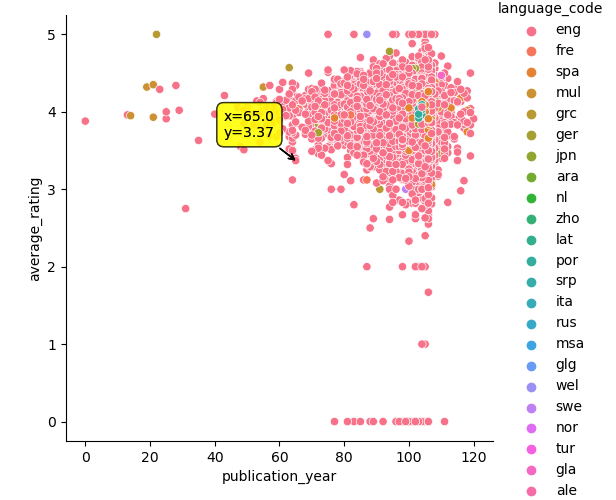

In [674]:
#Chart 5
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_5.png')
display(Image(filename=img_full))

Using
```
%matplotlib qt

sns.relplot(data=df, x="publication_year", y="average_rating", hue="language_code")
cursor(hover=True)
plt.show()
```

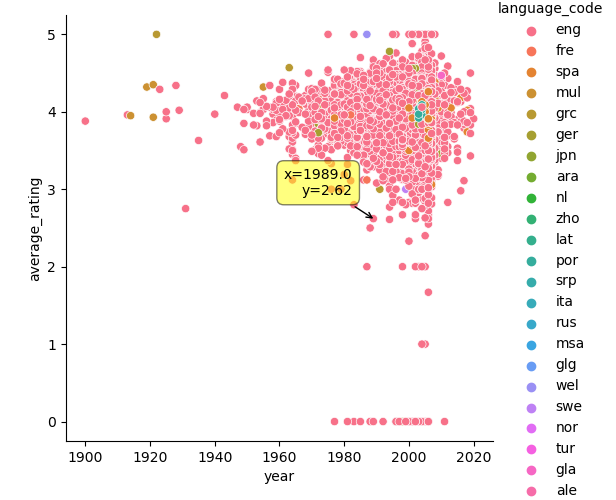

In [675]:
#Chart
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart.png')
display(Image(filename=img_full))

Using
```
%matplotlib qt

sns.relplot(data=df, x="year", y="average_rating", hue="language_code")
cursor(hover=True)
plt.show()
```

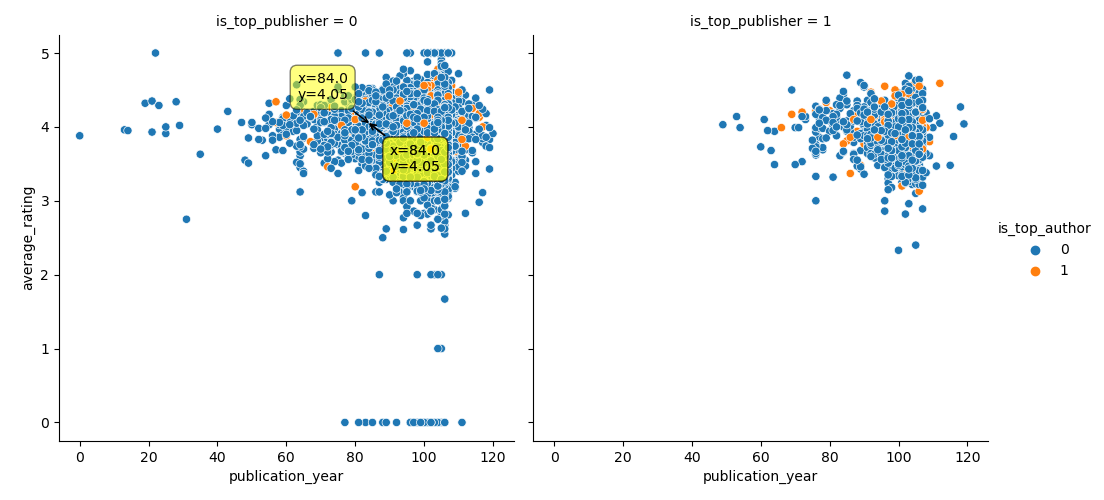

In [676]:
#Chart 6
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_6.png')
display(Image(filename=img_full))

Using
```
%matplotlib qt

sns.relplot(data=df, x="publication_year", y="average_rating", hue="is_top_author", col="is_top_publisher")
cursor(hover=True)
plt.show()
```

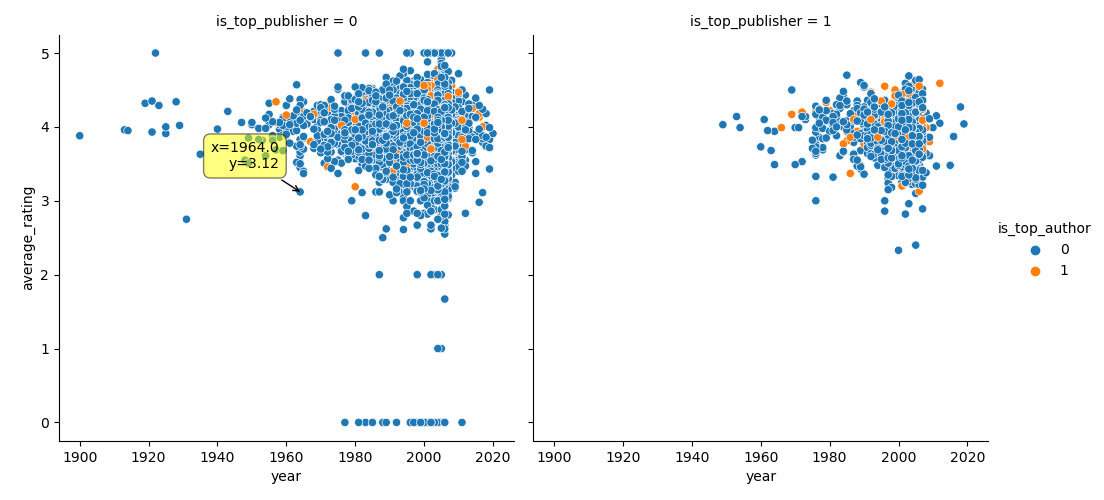

In [677]:
#Chart 6b
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_6b.png')
display(Image(filename=img_full))

Using
```
%matplotlib qt

sns.relplot(data=df, x="year", y="average_rating", hue="is_top_author", col="is_top_publisher")
cursor(hover=True)
plt.show()
```

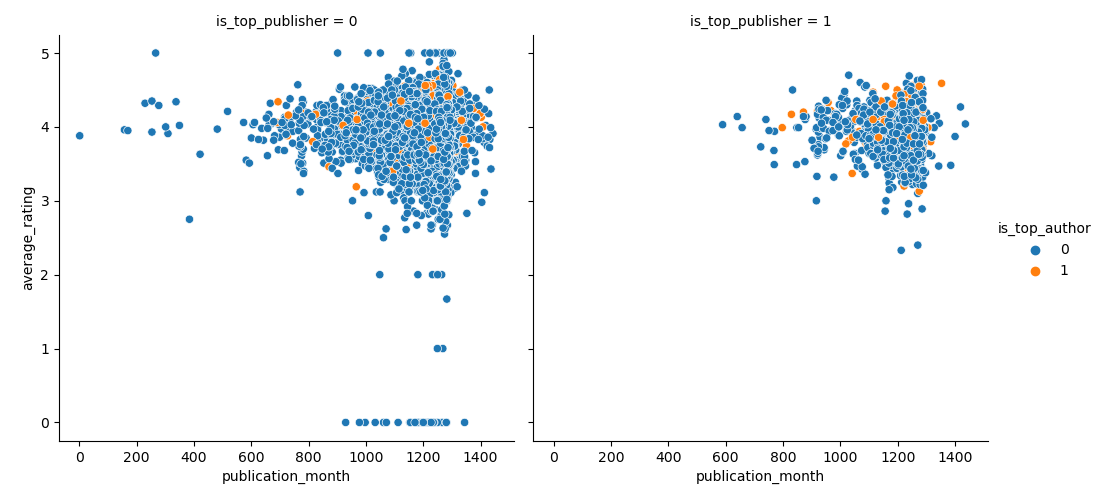

In [678]:
#Chart 7
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_7.png')
display(Image(filename=img_full))

Using
```
%matplotlib qt

sns.relplot(data=df, x="publication_month", y="average_rating", hue="is_top_author", col="is_top_publisher")
cursor(hover=True)
plt.show()
```

##### Did the books with most text_reviews_count receive a high rating

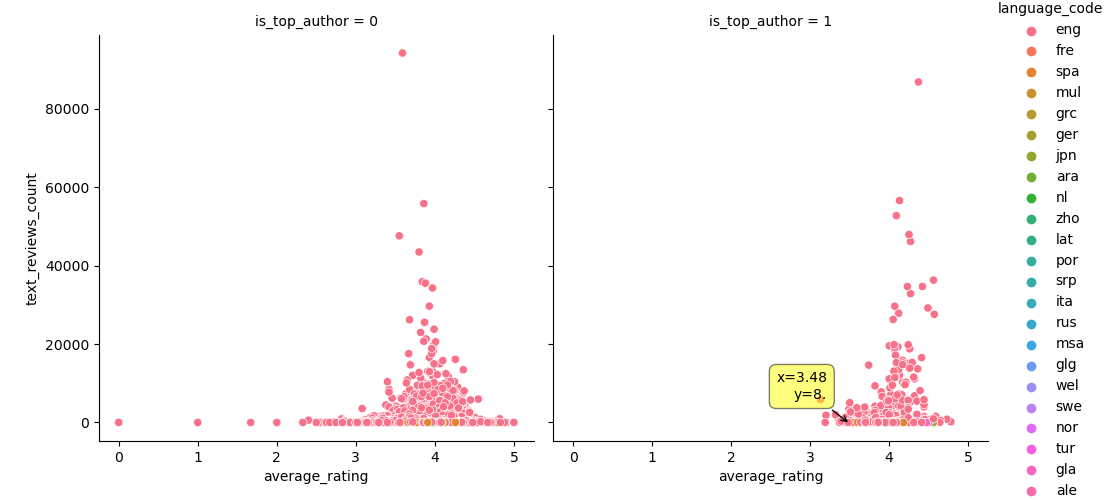

In [679]:
#Chart 8
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_8.png')
display(Image(filename=img_full))

Using
```
%matplotlib qt

sns.relplot(data=df, x="average_rating", y="text_reviews_count", hue="language_code", col="is_top_author")
cursor(hover=True)
plt.show()
```

In the dataset, the average rating is concentrated between 3-5. For high text review count, the books are usually rated around 4

##### Relationship between Highest Rating and Number of Pages

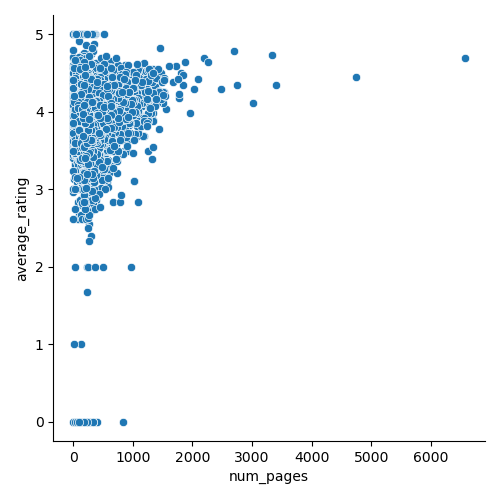

In [680]:
#Chart 9
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_9.png')
display(Image(filename=img_full))

Using
```
sns.relplot(data=df, x="num_pages", y="average_rating")
cursor(hover=True)
plt.show()
```

Most of the books with number of pages<2000 have an average rating between 3-4. This graph doesnt help in concluding anything. Let's explore a bit more for number of pages<2000

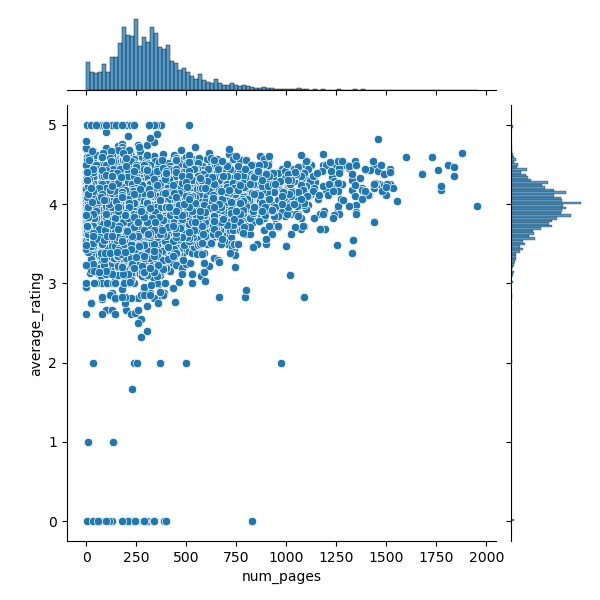

In [681]:
#Chart 10
curr_dir= os.getcwd()
img_path = os.path.join(curr_dir, 'Charts')
img_full = os.path.join(img_path, 'Chart_10.png')
display(Image(filename=img_full))

Using
```
explore=df[~(df['num_pages']>2000)]

sns.jointplot(data=explore, x="num_pages", y="average_rating")
cursor(hover=True)
plt.show()
```

Based on the jointplot above, we can infer that readers prefer reading books between 200-300 pages and rate them between 3-5